# ScratchML : Linear Regression
- Developing Linear Regression Model
- #### STEPS for Model :
    1. For plotting a best fit Line that represnts all data points
    2. Using (y = m*x + c) or (y cap = w*x + b)
    3. Using of Mean Squared Error to Calculate error
    4. Managing Weights and biass to best fit dataset using Gradient Descent
 
- #### Steps :
    1. Intilize weight and bias as 0
    2. Predict Result using above steps
    3. Calculate Error
    4. Use Gradient Descent to figure out new weight and bias values
    5. Repeat n times
    6. To peform Efficenctly : y = wx + b ------> y = wX + b ( X represents a tensor)

In [1]:
# Libaray import
import numpy as np
import pandas as pd

In [2]:
# Model Class


class LinearRegressions:

    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Extracting samples and features
        n_samples, n_features = X.shape

        # Init weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            # Peforiming dot product
            y_preds = np.dot(X, self.weights) + self.bias
    
            # Setting up Gradient Descent 
            dw = (1/n_samples) * np.dot(X.T, (y_preds - y))*2   # Dot prodict ncludes summation
            db = (1/n_samples) * np.sum(y_preds - y)*2
    
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self,X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

## Generating Dataset

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Using Modelled data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [5]:
X.shape, y.shape

((100, 1), (100,))

In [6]:
X_train.shape,y_train.shape

((67, 1), (67,))

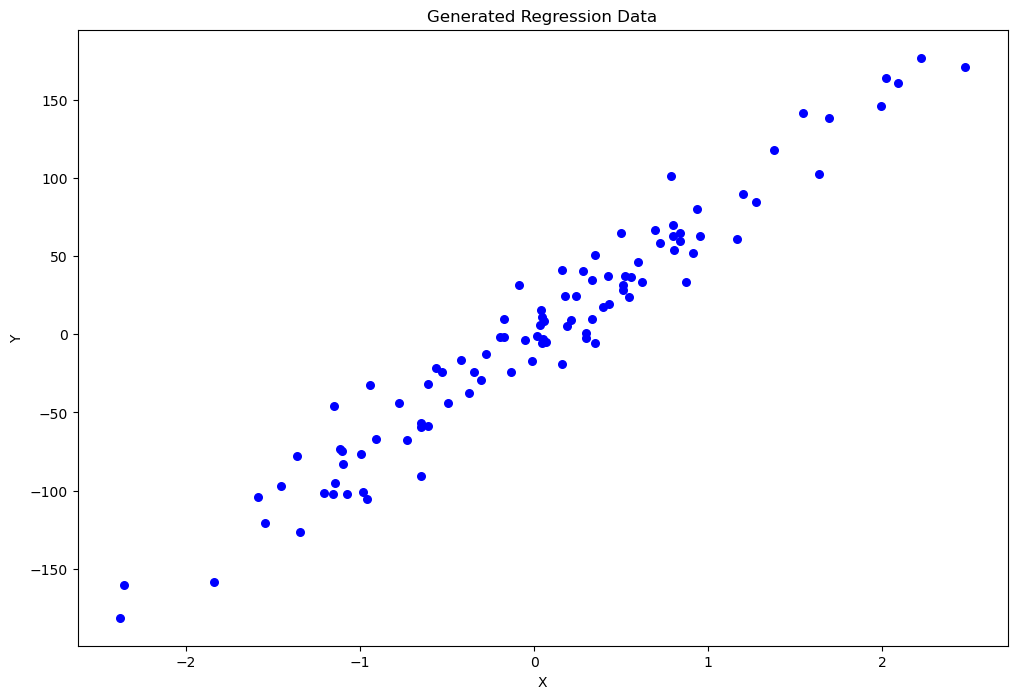

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y, color = "b", marker="o", s=30)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Regression Data")
plt.show()

## Setting Up Root MSE

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
def RMSE(pred, actual):
    return np.sqrt(mean_squared_error(pred , actual))

## Setting Up Model

In [10]:
reg_model = LinearRegressions()
reg_model.fit(X_train, y_train)
predictions = reg_model.predict(X_test)

In [11]:
# Pritting RMSE Score
print(f"RMSE : {RMSE(predictions, y_test)}")

RMSE : 18.38092065458068


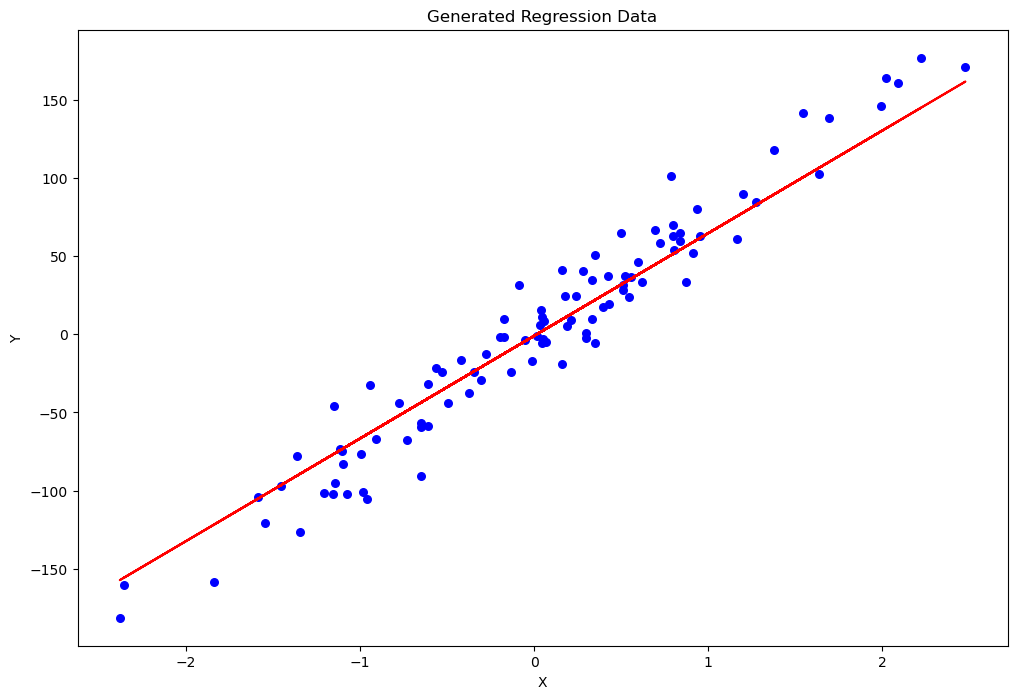

In [12]:
## Plotting Data 
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y, color = "b", marker="o", s=30)
plt.plot(X, reg_model.predict(X), color="r")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Regression Data")
plt.show()

### Observations :
- Current Fit Does not peform that well, Thus we can use Learning Rate param that we setup


## Test Zone with Learning Rate

In [13]:
# Defining a function to extract Besrt Learning Rate

def learning_rate_optimizer():
    learning_rate = [0.000, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.05, 0.1]
    best_score = float("inf")
    best_lr = None
    
    for rate in learning_rate:
        reg_model = LinearRegressions(lr=rate)
        reg_model.fit(X_train, y_train)
        preds = reg_model.predict(X_test)
        score = RMSE(preds, y_test)

        if score < best_score:
            best_lr = rate
            best_score = score

    return best_lr

In [14]:
print(f"Best Learning Rate: {learning_rate_optimizer()}")

Best Learning Rate: 0.003


## Tesing out Function

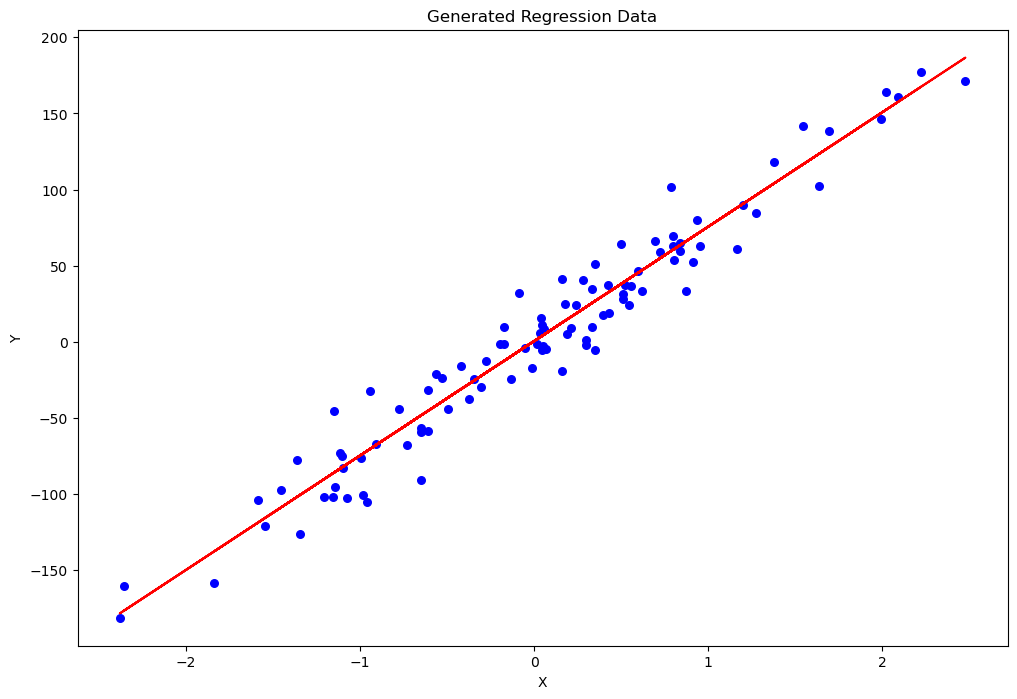

In [15]:
## Loading Model
reg_model = LinearRegressions(lr=0.003, n_iter=100000)
reg_model.fit(X_train, y_train)

## Plotting Data 
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y, color = "b", marker="o", s=30)
plt.plot(X, reg_model.predict(X), color="r")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Regression Data")
plt.show()

In [16]:
# Pritting RMSE Score
reg_model = LinearRegressions(lr=0.003)
reg_model.fit(X_train, y_train)
predictions = reg_model.predict(X_test)
print(f"RMSE : {RMSE(predictions, y_test):3f}")

RMSE : 16.797902


## Lets Compare ! 
- We compare it with Sklearn's Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
LR = LinearRegression()
LR.fit(X_train, y_train)
preds = LR.predict(X_test)
print(f"RMSE : {RMSE(preds, y_test):3f}")

RMSE : 16.816019


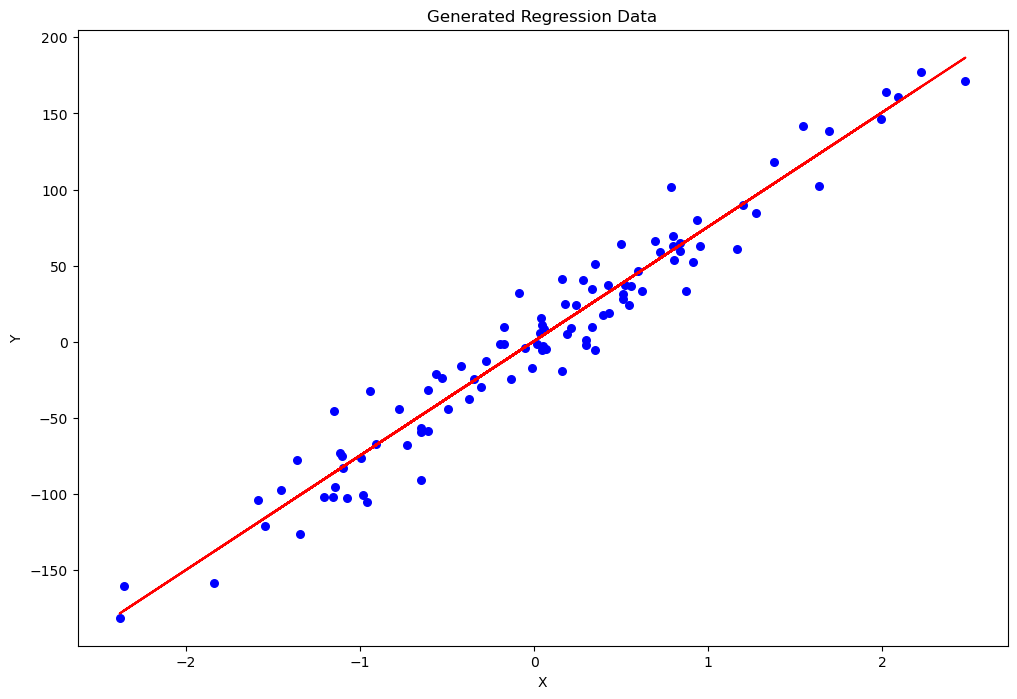

In [22]:
## Plotting Data 
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y, color = "b", marker="o", s=30)
plt.plot(X, LR.predict(X), color="r")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Regression Data")
plt.show()

## To match gradient descent in our custom model lets use SGD

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
SGD = SGDRegressor(loss='squared_error', alpha=0.003)
SGD.fit(X_train, y_train)

predictions = SGD.predict(X_test)
print(f"RMSE : {RMSE(predictions, y_test):3f}")

RMSE : 16.797791


In [25]:
# SGD Value Optimizer
# Defining a function to extract Besrt alpha rate

def learning_rate_optimizer_sgd():
    learning_rate = [0.000, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.05, 0.1]
    best_score = float("inf")
    best_lr = None

    for rate in learning_rate:
        reg_model = SGDRegressor(alpha=rate, penalty=None)
        reg_model.fit(X_train, y_train)
        preds = reg_model.predict(X_test)
        score = RMSE(preds, y_test)

        if score < best_score:
            best_score = score
            best_lr = rate

    return best_lr

In [26]:
print("Highest value: ",learning_rate_optimizer_sgd())

Highest value:  0.001


## Final Findings

In [27]:
# Your custom LinearRegression implementation
reg_model = LinearRegressions(lr=learning_rate_optimizer(), n_iter=1000)
reg_model.fit(X_train, y_train)
predictions = reg_model.predict(X_test)
print(f"RMSE (Custom LinearRegression): {RMSE(predictions, y_test):3f}")

# SGDRegressor implementation
SGD = SGDRegressor(loss='squared_error', alpha=learning_rate_optimizer_sgd(), max_iter=1000, penalty=None)
SGD.fit(X_train, y_train)
predictions = SGD.predict(X_test)
print(f"RMSE (SGDRegressor): {RMSE(predictions, y_test):3f}")

# Sklearn Linear Regression implementation
LR = LinearRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
print(f"RMSE (Linear Regression): {RMSE(predictions, y_test):3f}")

RMSE (Custom LinearRegression): 16.797902
RMSE (SGDRegressor): 16.813895
RMSE (Linear Regression): 16.816019


## Plot : Custom Linear Regression

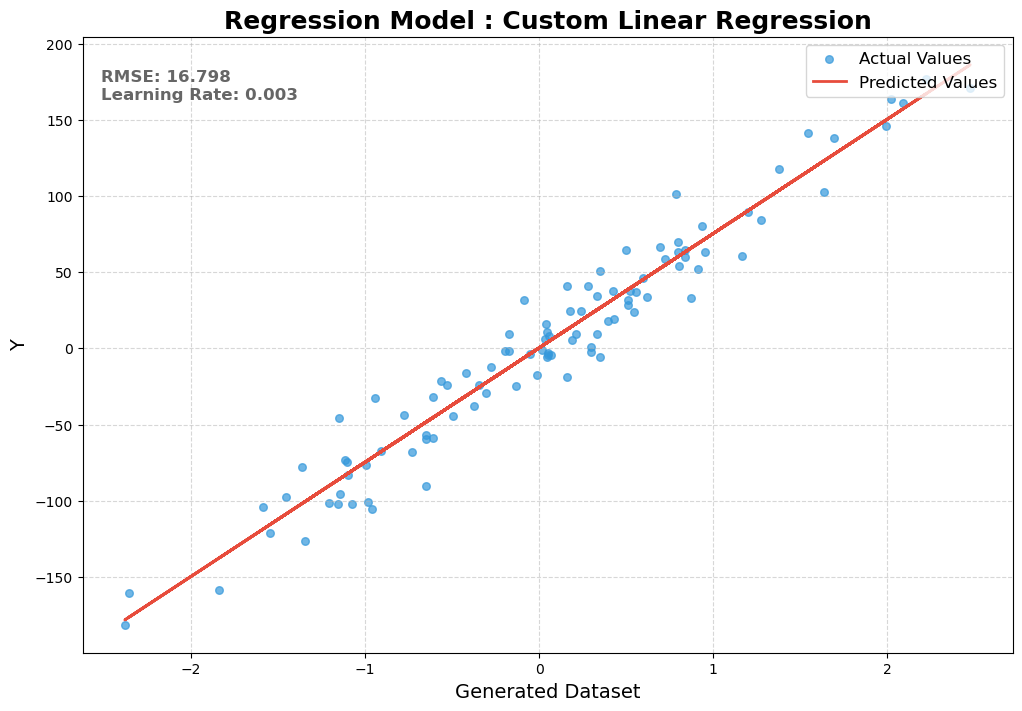

In [41]:
## Plotting Data 
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y, color = "#3498db", marker="o", s=30, label="Actual Values", alpha=0.7)
plt.plot(X, reg_model.predict(X), color="#e74c3c", label="Predicted Values", linewidth=2)

# Add RMSE score and learning rate to the plot
rmse_score = RMSE(predictions, y_test)
learning_rate = reg_model.lr

plt.title("Regression Model : Custom Linear Regression", fontsize=18, fontweight="bold")
plt.text(0.02, 0.92, f"RMSE: {rmse_score:.3f}\nLearning Rate: {learning_rate:.3f}", 
         ha="left", va="center", transform=plt.gca().transAxes, fontsize=12, fontweight="bold", color="#666666")

plt.xlabel("Generated Dataset", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Save the plot to a file
plt.savefig("custom_linear_regression_plot.png", dpi=300, bbox_inches="tight")

plt.show()

## Plot : Sklearn Linear Regression

RMSE : 16.816019


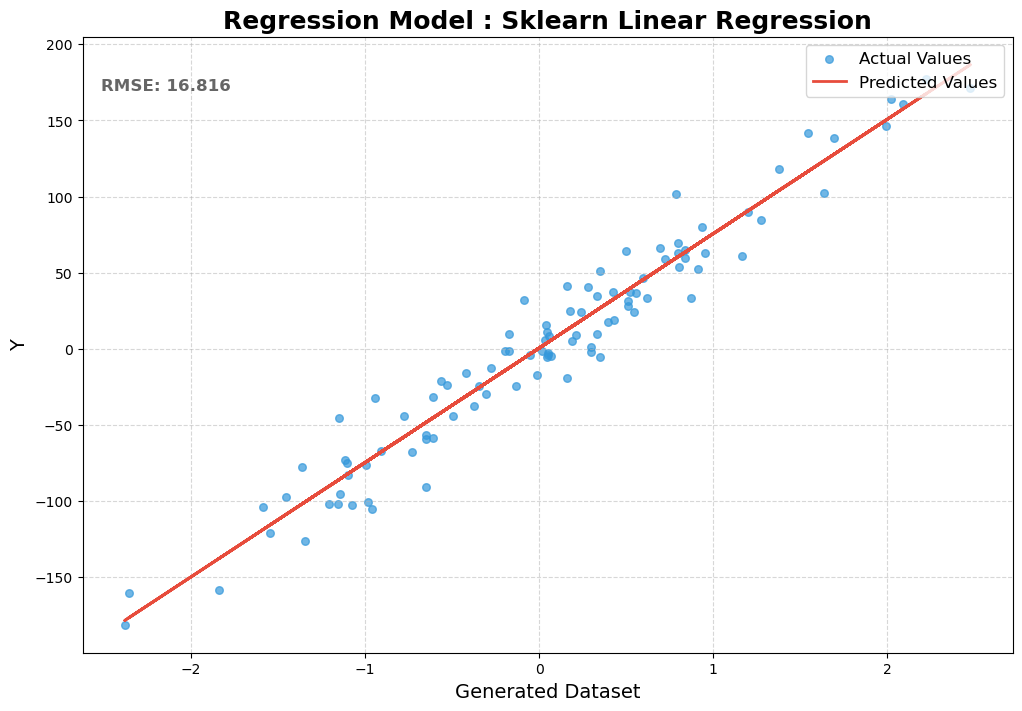

In [42]:
LR = LinearRegression()
LR.fit(X_train, y_train)
preds = LR.predict(X_test)
print(f"RMSE : {RMSE(preds, y_test):3f}")

## Plotting Data 
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y, color = "#3498db", marker="o", s=30, label="Actual Values", alpha=0.7)
plt.plot(X, LR.predict(X), color="#e74c3c", label="Predicted Values", linewidth=2)

plt.title("Regression Model : Sklearn Linear Regression", fontsize=18, fontweight="bold")
plt.text(0.02, 0.92, f"RMSE: {RMSE(preds, y_test):.3f}", 
         ha="left", va="center", transform=plt.gca().transAxes, fontsize=12, fontweight="bold", color="#666666")

plt.xlabel("Generated Dataset", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Save the plot to a file
plt.savefig("sklearn_linear_regression_plot.png", dpi=300, bbox_inches="tight")

plt.show()

## Plot : SGDRegressor

RMSE (SGDRegressor): 16.808126


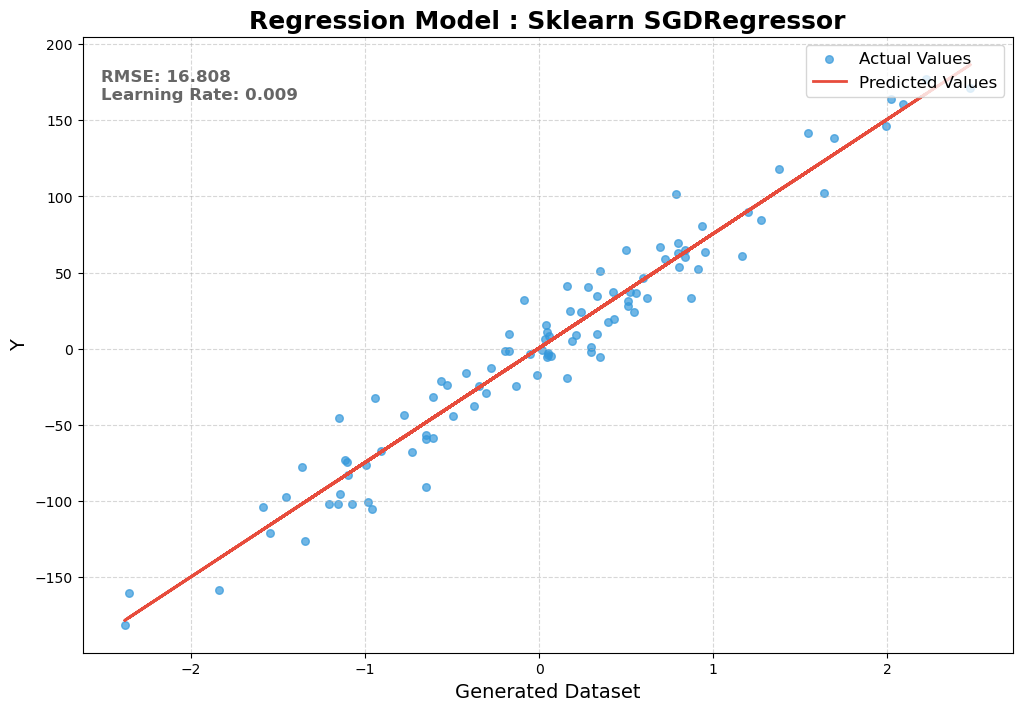

In [54]:
# SGDRegressor implementation
SGD = SGDRegressor(loss='squared_error', alpha=learning_rate_optimizer_sgd(), max_iter=1000, penalty=None)
SGD.fit(X_train, y_train)
predictions = SGD.predict(X_test)
print(f"RMSE (SGDRegressor): {RMSE(predictions, y_test):3f}")

## Plotting Data 
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], y, color = "#3498db", marker="o", s=30, label="Actual Values", alpha=0.7)
plt.plot(X, SGD.predict(X), color="#e74c3c", label="Predicted Values", linewidth=2)

plt.title("Regression Model : Sklearn SGDRegressor", fontsize=18, fontweight="bold")
plt.text(0.02, 0.92, f"RMSE: {RMSE(predictions, y_test):.3f}\nLearning Rate: {learning_rate_optimizer_sgd():.3f}", 
         ha="left", va="center", transform=plt.gca().transAxes, fontsize=12, fontweight="bold", color="#666666")

plt.xlabel("Generated Dataset", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Save the plot to a file
plt.savefig("sgd_regressor_plot.png", dpi=300, bbox_inches="tight")

plt.show()